# GMM for clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mplot3d
import os
from sklearn.mixture import GaussianMixture

### Choosing 25 subjects from 68 in the CMU PIE dataset

In [2]:
PIE_subjects = os.listdir("PIE")
selected_subjects = np.random.choice(PIE_subjects, size = 25, replace = False)
train_photos_path = []
test_photos_path  = []
for subject in selected_subjects:
    subject_photos = os.listdir("PIE"+"/"+subject)
    subject_train  = np.random.choice(subject_photos, size = int(0.7*len(subject_photos)), replace=False)
    subject_test   = np.setdiff1d(subject_photos, subject_train)
    for photo in subject_train :
        train_photos_path.append("PIE"+'/'+subject+'/'+photo)
    for photo in subject_test :
        test_photos_path.append("PIE"+'/'+subject+'/'+photo)

train_photos_array =  np.array([plt.imread(photo) for photo in train_photos_path])
test_photos_array =  np.array([plt.imread(photo) for photo in test_photos_path])
print("The selected subjects are :\n", selected_subjects)

The selected subjects are :
 ['27' '47' '5' '55' '7' '6' '20' '38' '4' '19' '17' '59' '57' '26' '66'
 '46' '35' '50' '34' '16' '28' '14' '49' '29' '42']


In [3]:
X_train = train_photos_array
Y_train = np.array([path.split('/')[-2] for path in train_photos_path])
X_test  = test_photos_array
Y_test  = np.array([path.split('/')[-2] for path in test_photos_path])

### reading my selfies

In [4]:
selfies = os.listdir("selfies")
selfies_path = []
for selfie in selfies :
    selfies_path.append("selfies" + '/' + selfie)
train_selfies_path = np.random.choice(selfies_path, size = 7, replace=False)
test_selfies_path  = np.setdiff1d(selfies_path, train_selfies_path)

#train_selfies_array = np.array([plt.imread(selfie) for selfie in train_selfies_name])
#test_selfies_array = np.array([plt.imread(selfie) for selfie in test_selfies_name])

In [5]:
X_train_selfies = np.array([plt.imread(selfie) for selfie in train_selfies_path])
X_test_selfies  = np.array([plt.imread(selfie) for selfie in test_selfies_path])

Y_train_selfies = np.array([69 for i in range(7)])
Y_test_selfies  = np.array([69 for i in range(3)])

In [6]:
_, img_size1, img_size2 = X_train.shape
num_features = img_size1*img_size2

In [7]:
# Add the selfies to X_Train, X_test and Y_train, Y_test
X_train = np.concatenate((X_train, X_train_selfies), axis=0).reshape((len(X_train)+7, num_features))
X_test  = np.concatenate((X_test, X_test_selfies), axis=0).reshape((len(X_test)+3, num_features))
Y_train = np.concatenate((Y_train, Y_train_selfies), axis=0)
Y_test  = np.concatenate((Y_test, Y_test_selfies), axis=0)

In [8]:
# The overall data
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((Y_train, Y_test), axis=0)

### Apply PCA

In [9]:
def PCA(data):
    data_centered = data - np.mean(data, axis=0)
    cov_m = np.cov(data_centered.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_m)
    # find the indexes of the highest eignevalues
    eigen_vals_indexes = np.argsort(abs(eigen_vals))[::-1]
    # sort the eigen values and vectors accordinly
    sorted_eigen_vals      = eigen_vals[eigen_vals_indexes]
    sorted_eigen_vecs      = eigen_vecs[:,eigen_vals_indexes]
    return sorted_eigen_vals, sorted_eigen_vecs

In [10]:
train_eigen_vals, train_eigen_vecs = PCA(X_train)

### Apply GMM

In [11]:
clusters_d = []

In [12]:
for d in [80, 200]:
    print("Dim : ", d)
    # Get the reduced X_train and X_test
    reduced_X_train = np.dot(X_train - np.mean(X_train, axis=0), train_eigen_vecs[:,:d]).real

    # Initiliaze the GMM
    gmm = GaussianMixture(n_components = 3, verbose=1)
    gmm.fit(reduced_X_train)
    
    clusters_d.append(gmm.predict(reduced_X_train))
    #print(cluster.shape)

Dim :  80
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Dim :  200
Initialization 0
Initialization converged: True


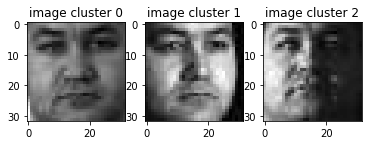

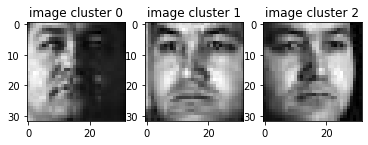

In [13]:
for cluster in clusters_d :
    fig=plt.figure()
    for i in range(3):
        vec_img = X_train[cluster==i].reshape(-1,img_size1, img_size2)[0]
        ax = fig.add_subplot(1, 3, i+1)
        ax.title.set_text('image cluster '+str(i))
        plt.imshow(vec_img,cmap='gray')